![Gesund](https://egirisim.com/wp-content/uploads/2023/08/gesund-ai-1068x580.jpg)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gesund-ai/gesund/blob/main/gesund/examples/object_detection_malaria.ipynb)

# Object Detection on Malaria Dataset 

This notebook provides and example of Gesund Validation with Object Detection

The notebook could be outlined as follows

- [Introduction](#intro)
- [Data Source](#data_source)
- [Basic Usage](#usage)
- [Explore Results](#results)

## <a id='intro'>Introduction</a>


To learn more about Gesundai Validation tool, Please visit the link <a href="https://gesund-ai.github.io/#gesund-ai">here</a>.

Please ensure you have installed the as per the installation instructions <a href="https://gesund-ai.github.io/user_guide.html#installation">here</a>.




## <a id='data_source'>Data Source</a>

### Official Dataset: [Malaria Bounding Boxes](https://www.kaggle.com/datasets/kmader/malaria-bounding-boxes)

### Dataset on Gesund Platform: [Malaria Blood Cell](https://app.gesund.ai/data/dataset-details/Dataset10/overview)


### Example image in the dataset 

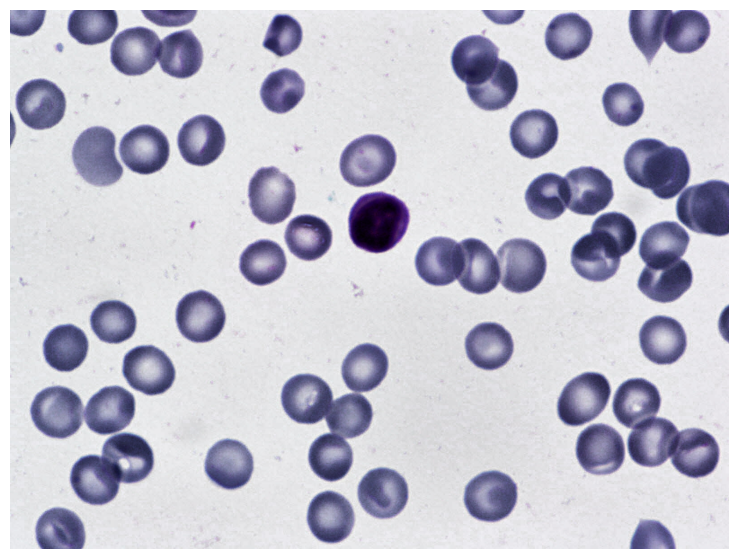

In [5]:
import os
import warnings

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
warnings.filterwarnings("ignore")


def show_image_in_dataset(image_path):
    """
    Displays an image from the dataset.

    :param image_path: Path to the image file.
    """

    full_image_path = os.path.expanduser(image_path)
    plt.style.use('seaborn-whitegrid')
    fig, ax = plt.subplots(figsize=(10, 7))
    img = mpimg.imread(full_image_path)
    ax.imshow(img)
    ax.axis('off')
    plt.show()

show_image_in_dataset("~/gesund/gesund/assets/example_image_of_malaria_blood_cell.png")

### To download the required JSON files, run the following commands in a Jupyter notebook cell


In [1]:
# Object Detection Annotation Data
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/object_detection/gesund_custom_format/annotation.json

# Object Detection Prediction Data
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/object_detection/gesund_custom_format/prediction.json

# Object Detection Mappings
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/object_detection/test_class_mappings.json

--2024-12-24 11:58:05--  https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/object_detection/gesund_custom_format/annotation.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 482615 (471K) [text/plain]
Saving to: ‘annotation.json’

annotation.json     100%[===================>] 471.30K  --.-KB/s    in 0.04s   

2024-12-24 11:58:06 (12.3 MB/s) - ‘annotation.json’ saved [482615/482615]

--2024-12-24 11:58:07--  https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/object_detection/gesund_custom_format/prediction.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|1

### A sample of Annotation, Prediction, and Class Mappings JSON files for Object Detection 

In [3]:
import json

def preview_jsons(file_path, preview_lines=20):
    try:
        with open(file_path, 'r') as file:
            for _ in range(preview_lines):
                line = file.readline().strip()
                if line:
                    print(line)

        with open(file_path, 'r') as file:
            data = json.load(file)
        return data

    except FileNotFoundError:
        raise FileNotFoundError(f"The file '{file_path}' was not found.")

json_files = [
    'annotation.json',
    'prediction.json',
    'test_class_mappings.json'
]
for json_file in json_files:
    try:
        print("-" * 50)
        print(f"Previewing {json_file}:")
        json_data = preview_jsons(json_file)
    except Exception as e:
        print(e, "\n")

--------------------------------------------------
Previewing annotation.json:
{
"bcd_2": {
"image_id": "bcd_2",
"annotation": [
{
"config_id": "uJ4FNIiXW4JyRCRRX_qzz",
"name": "default",
"id": "055bf20a-82ce-4fc1-bc36-34045d214a9e",
"label": 0,
"points": [
{
"x": 927,
"y": 72
},
{
"x": 1027,
"y": 170
}
],
"type": "rect"
--------------------------------------------------
Previewing prediction.json:
{
"bcd_2": {
"objects": [
{
"box": {
"x1": 898,
"y1": 54,
"x2": 1025,
"y2": 168
},
"confidence": 0.9752,
"prediction_class": 0
},
{
"box": {
"x1": 292,
"y1": 1054,
"x2": 369,
"y2": 1209
},
--------------------------------------------------
Previewing test_class_mappings.json:
{"0": "red blood cell", "1": "trophozoite", "2": "schizont", "3": "difficult", "4": "ring", "5": "leukocyte"}


## <a id='usage'> Basic Usage </a>

It is couple of simple lines of code to run `object detection validation` on your data. 

In [2]:
from gesund import Validation
from gesund.validation._result import ValidationResult
from gesund.core._managers.metric_manager import metric_manager
from gesund.core._managers.plot_manager import plot_manager


In [3]:
show_plots = False

available_object_detection_validation_metrics = [
    ({"problem_type": "object_detection"}, ["top_losses", "predicted_distribution", "confidence_distribution", "average_precision"], None),
    ]

for plot_config, metric_names, cohort_id in available_object_detection_validation_metrics:
    data_dir = f"./tests/_data/{plot_config['problem_type']}"
    validator = Validation(
        annotations_path=f"{data_dir}/gesund_custom_format/annotation.json",
        predictions_path=f"{data_dir}/gesund_custom_format/prediction.json",
        class_mapping=f"{data_dir}/test_class_mappings.json",
        problem_type=plot_config["problem_type"],
        data_format="json",
        json_structure_type="gesund",
        plot_config=plot_config,
        cohort_args={"selection_criteria": "random"},
        metric_args={"threshold": [0.25, 0.5, 0.75]},
    )
    validation_results = validator.run()
    
    for metric_name in metric_names:
        if show_plots: 
                validation_results.plot(metric_name=metric_name, save_plot=False, cohort_id=cohort_id)

annotations path validated !
predictions path validated !
class mapping file validated !
Problem Type validated !
JSON structure type validated!
Data format validated!
No metadata path provided.
Running  object_detection.top_losses .....


Running  object_detection.average_precision .....
Running  object_detection.predicted_distribution .....
Running  object_detection.confidence_distribution .....


#### Validation attributes

<hr />


1. `run`: Controls validation execution parameters that the function uses to run the validation pipeline.

2. `plot`: Handles visualization settings that the function uses to plot the given metrics.

3. `save`: Manages result storage options that the function uses to save the metrics in JSON format.

4. `validation results`: Structures output format according to the given parameters.

<hr />

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


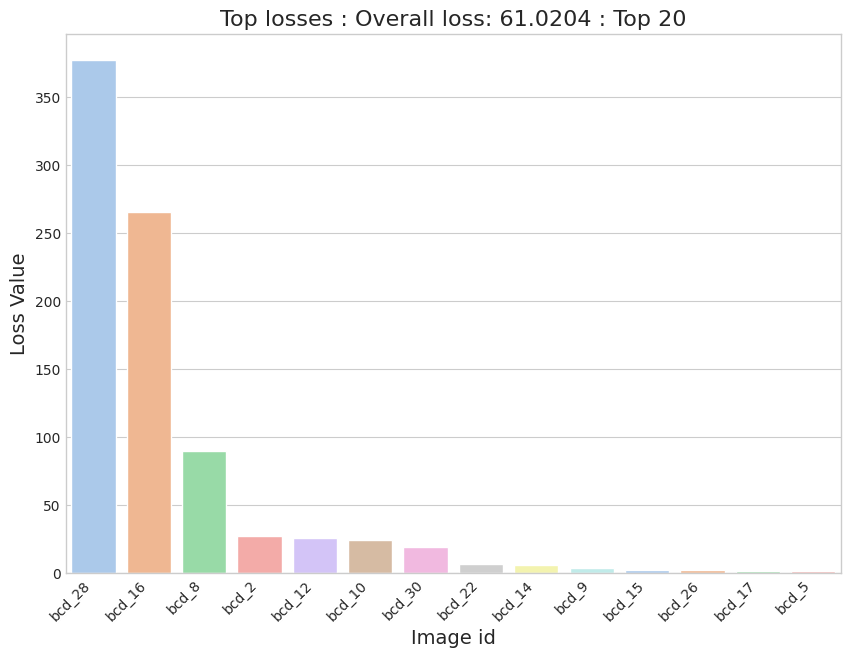

In [6]:
validation_results.plot(metric_name="top_losses", save_plot=False, cohort_id=cohort_id)

In [7]:
validation_results.save(metric_name)

In [8]:
validation_results.__dict__.keys()

dict_keys(['data', 'user_params', 'result', 'cohort_args', 'plot_args'])

#### Class instance attributes

<hr />

1. `data`: A pydantic model following the *UserInputData* that contains all the loaded user data.

2. `user_params`: A pydantic model following the schema *UserInputParams* that contains all the parameters provided.

3. `result`: Stores all computed outputs.

4. `cohort_args`: Defines how subsets of data are chosen for processing.

5. `plot_args`: Holds parameters for customizing the generated plots.


<hr />

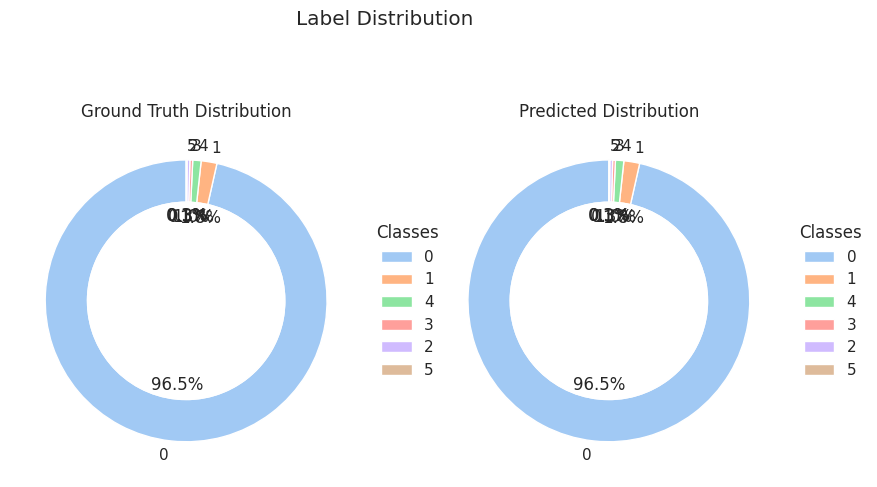

In [9]:
validation_results.plot(metric_name="predicted_distribution", save_plot=False, cohort_id=cohort_id)

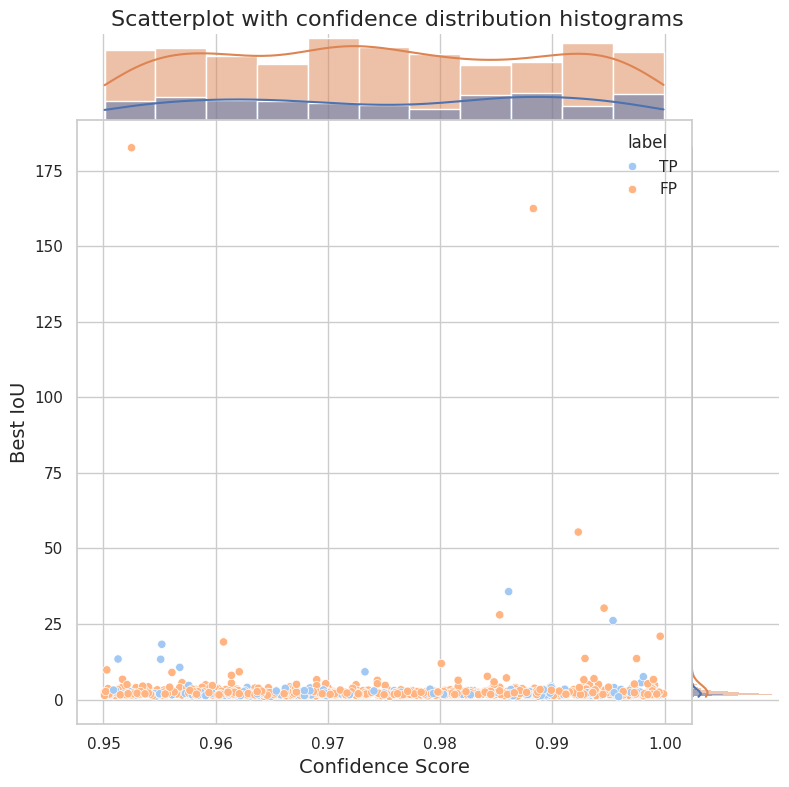

In [10]:
validation_results.plot(metric_name="confidence_distribution", save_plot=False, cohort_id=cohort_id)

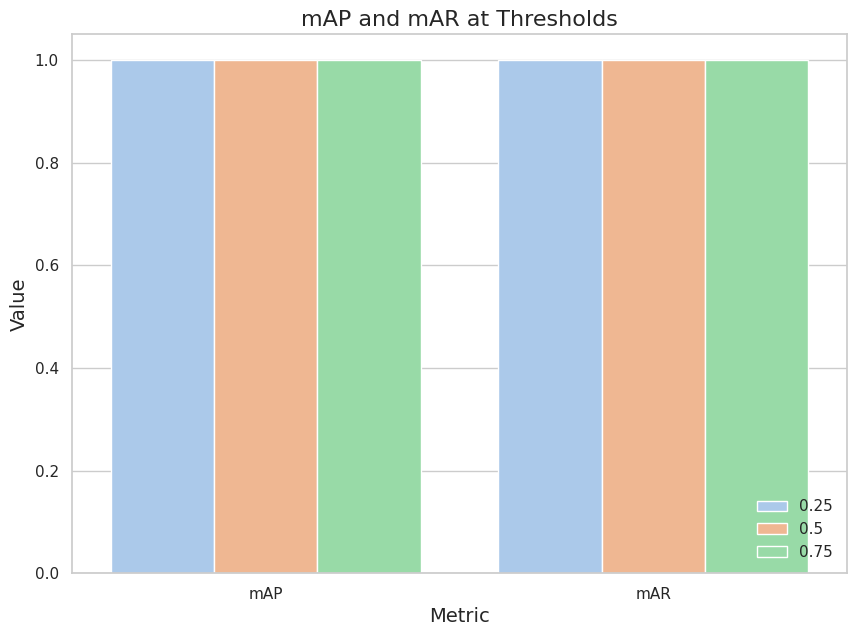

In [11]:
validation_results.plot(metric_name="average_precision", save_plot=False, cohort_id=cohort_id)

### Default config parameters initialize step by step

In [ ]:
import sys
import os

sys.path.append(os.path.expanduser('~/gesund/examples/'))
from utils import callable_plot_config

problem_type = "object_detection"
plot_configuration = callable_plot_config(problem_type)
metric_name = "top_losses"
cohort_id = None
data_dir = f"./tests/_data/{problem_type}"


validator = Validation(
    annotations_path=f"{data_dir}/gesund_custom_format/annotation.json",
    predictions_path=f"{data_dir}/gesund_custom_format/prediction.json",
    class_mapping=f"{data_dir}/test_class_mappings.json",
    problem_type=problem_type,
    data_format="json",
    json_structure_type="gesund",
    plot_config=plot_configuration,
    cohort_args={"selection_criteria": "random"},
    metric_args={"threshold": [0.25, 0.5, 0.75]},
)

validation_results = validator.run()

annotations path validated !
predictions path validated !
class mapping file validated !
Problem Type validated !
JSON structure type validated!
Data format validated!
No metadata path provided.
Running  object_detection.top_losses .....
Running  object_detection.average_precision .....
Running  object_detection.predicted_distribution .....
Running  object_detection.confidence_distribution .....


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


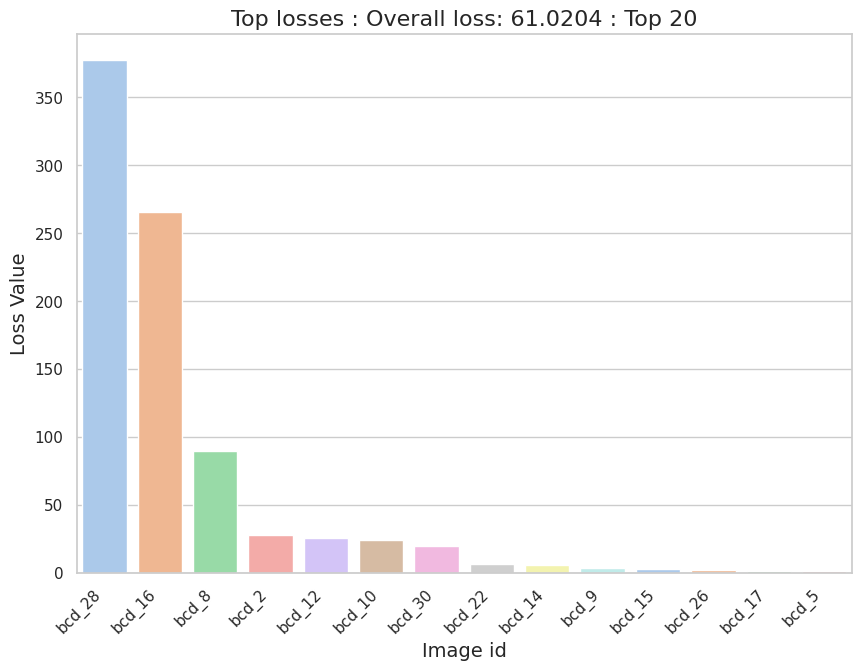

In [15]:
validation_results.plot(metric_name=metric_name, save_plot=False, cohort_id=cohort_id)

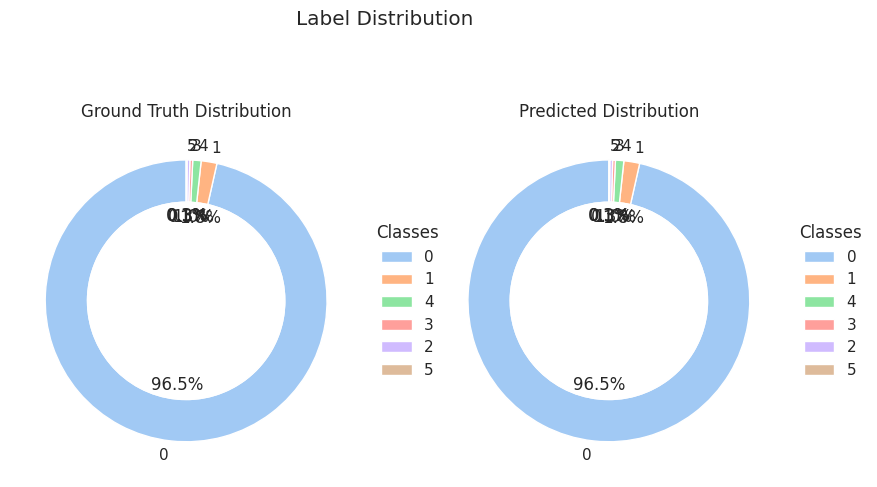

In [20]:
validation_results.plot(metric_name='predicted_distribution', save_plot=False, cohort_id=cohort_id)

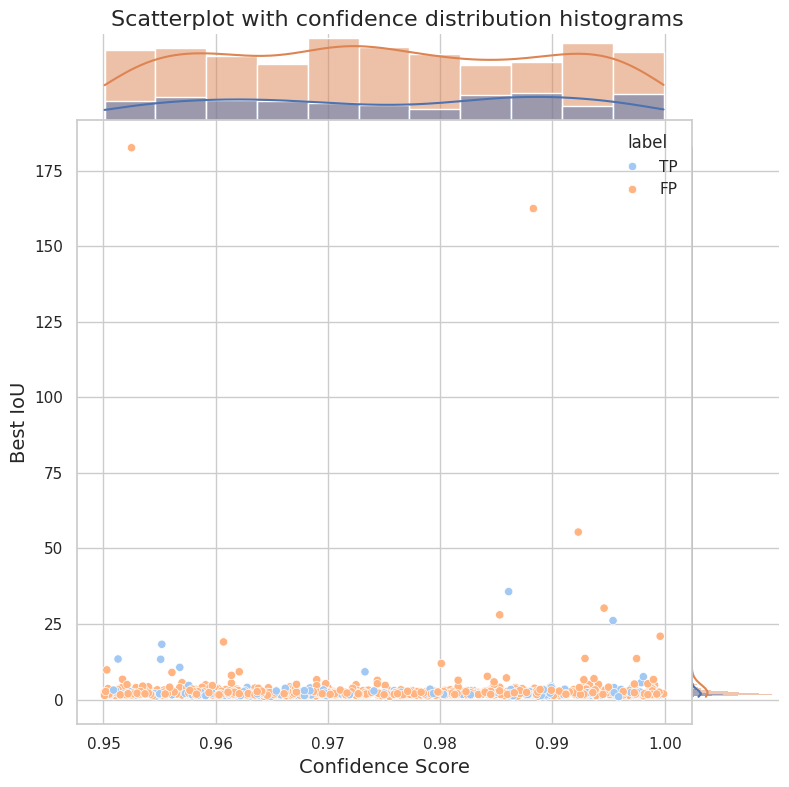

In [21]:
validation_results.plot(metric_name='confidence_distribution', save_plot=False, cohort_id=cohort_id)

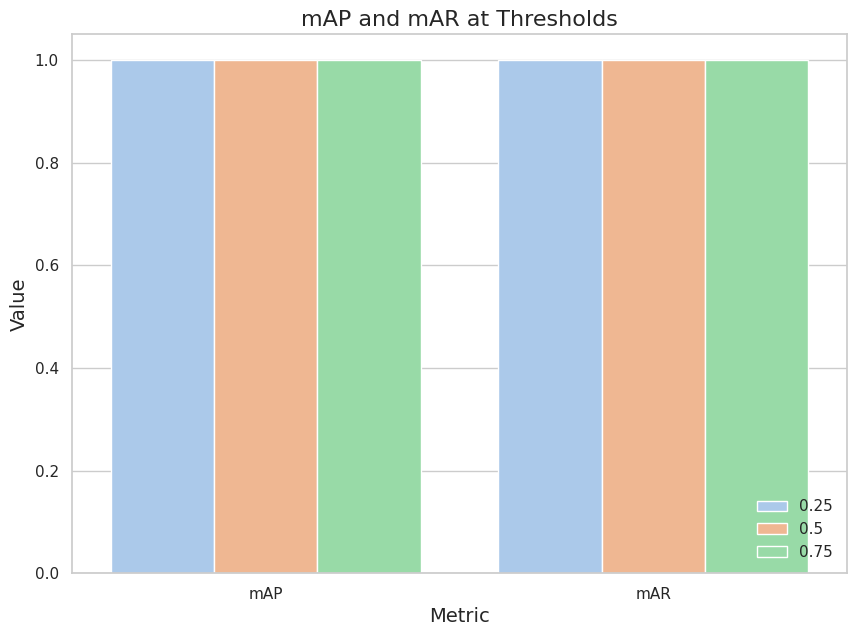

In [22]:
validation_results.plot(metric_name='average_precision', save_plot=False, cohort_id=cohort_id)